In [1]:
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt

In [22]:
df=pd.read_csv('F:\Python Prac\ToyData.csv',parse_dates=['ORDERDATE'])

In [24]:
a=df.groupby(['ORDERDATE','PRODUCTLINE','PRODUCTCODE','COUNTRY','STATE','CITY','POSTALCODE']).agg({'SALES':'sum','QUANTITYORDERED':'mean'})

In [25]:
a.reset_index(inplace=True)

In [26]:
def monthBeginDate(row):
    return datetime.date(row['ORDERDATE'].year,row['ORDERDATE'].month,1)

In [27]:
a['monthBeginDate']=a.apply(monthBeginDate,axis=1)

In [28]:
b=a.groupby(['monthBeginDate','PRODUCTLINE','PRODUCTCODE','COUNTRY','STATE','CITY','POSTALCODE']).agg({'SALES':'sum','QUANTITYORDERED':'mean'})

In [29]:
b.reset_index(inplace=True)

In [30]:
b=b.rename(columns={'monthBeginDate':'ORDERDATE'})

In [31]:
c=b.groupby(['ORDERDATE','COUNTRY','STATE']).agg({'SALES':'sum','QUANTITYORDERED':'mean'})

In [32]:
c.reset_index(inplace=True)

In [33]:
c['ORDERDATE']=pd.to_datetime(c['ORDERDATE'])

In [34]:
c=c.groupby([pd.PeriodIndex(c.ORDERDATE,freq='Q'),'COUNTRY']).agg({'SALES':'sum','QUANTITYORDERED':'mean'})

In [35]:
c.reset_index(inplace=True)

In [37]:
c

,ORDERDATE,COUNTRY,SALES,QUANTITYORDERED
0,2003Q1,Denmark,58871.11,36.333333
1,2003Q1,Germany,11432.34,35.500000
2,2003Q1,Italy,56181.32,37.500000
3,2003Q1,Norway,54702.00,33.812500
4,2003Q1,Philippines,55245.02,35.062500
...,...,...,...,...
109,2005Q2,Japan,553.95,15.000000
110,2005Q2,Singapore,2587.58,33.500000
111,2005Q2,Spain,119242.98,42.739130
112,2005Q2,UK,40802.81,41.222222


In [40]:
c['ORDERDATE'].max()

Period('2005Q2', 'Q-DEC')

In [16]:
c['ORDERDATE']=c['ORDERDATE'].astype('str')

In [17]:
c.set_index('ORDERDATE',inplace=True)

In [18]:
c

,SALES,QUANTITYORDERED
ORDERDATE,,
2003Q1,445094.69,34.739892
2003Q2,562365.22,34.793653
2003Q3,649514.54,32.579139
2003Q4,1860005.09,34.984150
2004Q1,833730.68,35.569632
2004Q2,781203.82,34.148431
2004Q3,1109396.27,34.790331
2004Q4,2096637.56,35.311858
2005Q1,1110954.57,36.201307


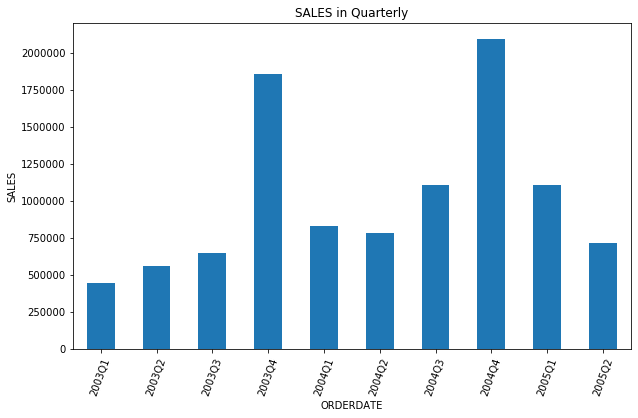

In [19]:
c['SALES'].plot(kind='bar',figsize=(10,6),title='SALES in Quarterly')
plt.xticks(rotation=70)
plt.ylabel('SALES')
plt.savefig('F:\Python Prac\sales_quaterly.png',bbox_inches='tight')

In [20]:
c.loc[['2003Q1','2004Q1','2005Q1']]

,SALES,QUANTITYORDERED
ORDERDATE,,
2003Q1,445094.69,34.739892
2004Q1,833730.68,35.569632
2005Q1,1110954.57,36.201307
